# (03) vH — remove low contrast

**Motivation**: van Hateren dataset: look at $16 \times 16$ tiles, identify and remove the low contrast patches. <br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-vae/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-vae/figs')
tmp_dir = os.path.join(git_dir, 'jb-vae/tmp')

# GitHub
sys.path.insert(0, os.path.join(git_dir, '_PoissonVAE'))
from figures.fighelper import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)
from rich.jupyter import print
%matplotlib inline
set_style()

In [2]:
from figures.imgs import plot_weights
from utils.imgproc import (
    do_process, xtract_patches,
    do_fft, compute_fftfreq,
    EyeDataset,
)

## DOVES $(24 \rightarrow 16)$

In [3]:
npix = 24
doves = EyeDataset()
patches = xtract_patches(doves.imgs, npix)
x_wt, x_wt_cn, x_wt_cn_zs = do_process(patches)
x = patches[..., 4:-4, 4:-4]

doves.imgs.shape, x.shape, x_wt_cn_zs.shape

(torch.Size([101, 1, 768, 1024]),
 torch.Size([101, 1344, 1, 16, 16]),
 torch.Size([101, 1344, 1, 16, 16]))

In [4]:
patches = tonp(x)
vars = np.var(patches, axis=(-1, -2))
vars = np.log(vars.ravel())
vars.shape

(135744,)

## Remove bottom 5%

In [5]:
q = 0.05
thres = np.quantile(vars, q)
accept = vars > thres

msg = f"# removed: {(~accept).sum()} ——— # final: {accept.sum()}"
print(msg)

# removed: 6788 ——— # final: 128956

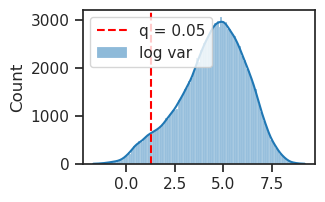

In [6]:
ax = sns.histplot(vars, kde=True, label='log var')
ax.axvline(thres, color='r', ls='--', label=f'q = {q}')
plt.legend()
plt.show()

## Sort based on variance

In [7]:
indices = np.argsort(vars)
vars_sorted = vars[indices]
accept_sorted = accept[indices]
patches_sorted = flatten_np(tonp(x), end_dim=2)[indices]
processed_sorted = flatten_np(tonp(x_wt_cn_zs), end_dim=2)[indices]

## Accept/reject boundary

In [8]:
boundary_i = np.where(np.diff(accept_sorted.astype(int)) == 1)[0].item()
boundary_i

6787

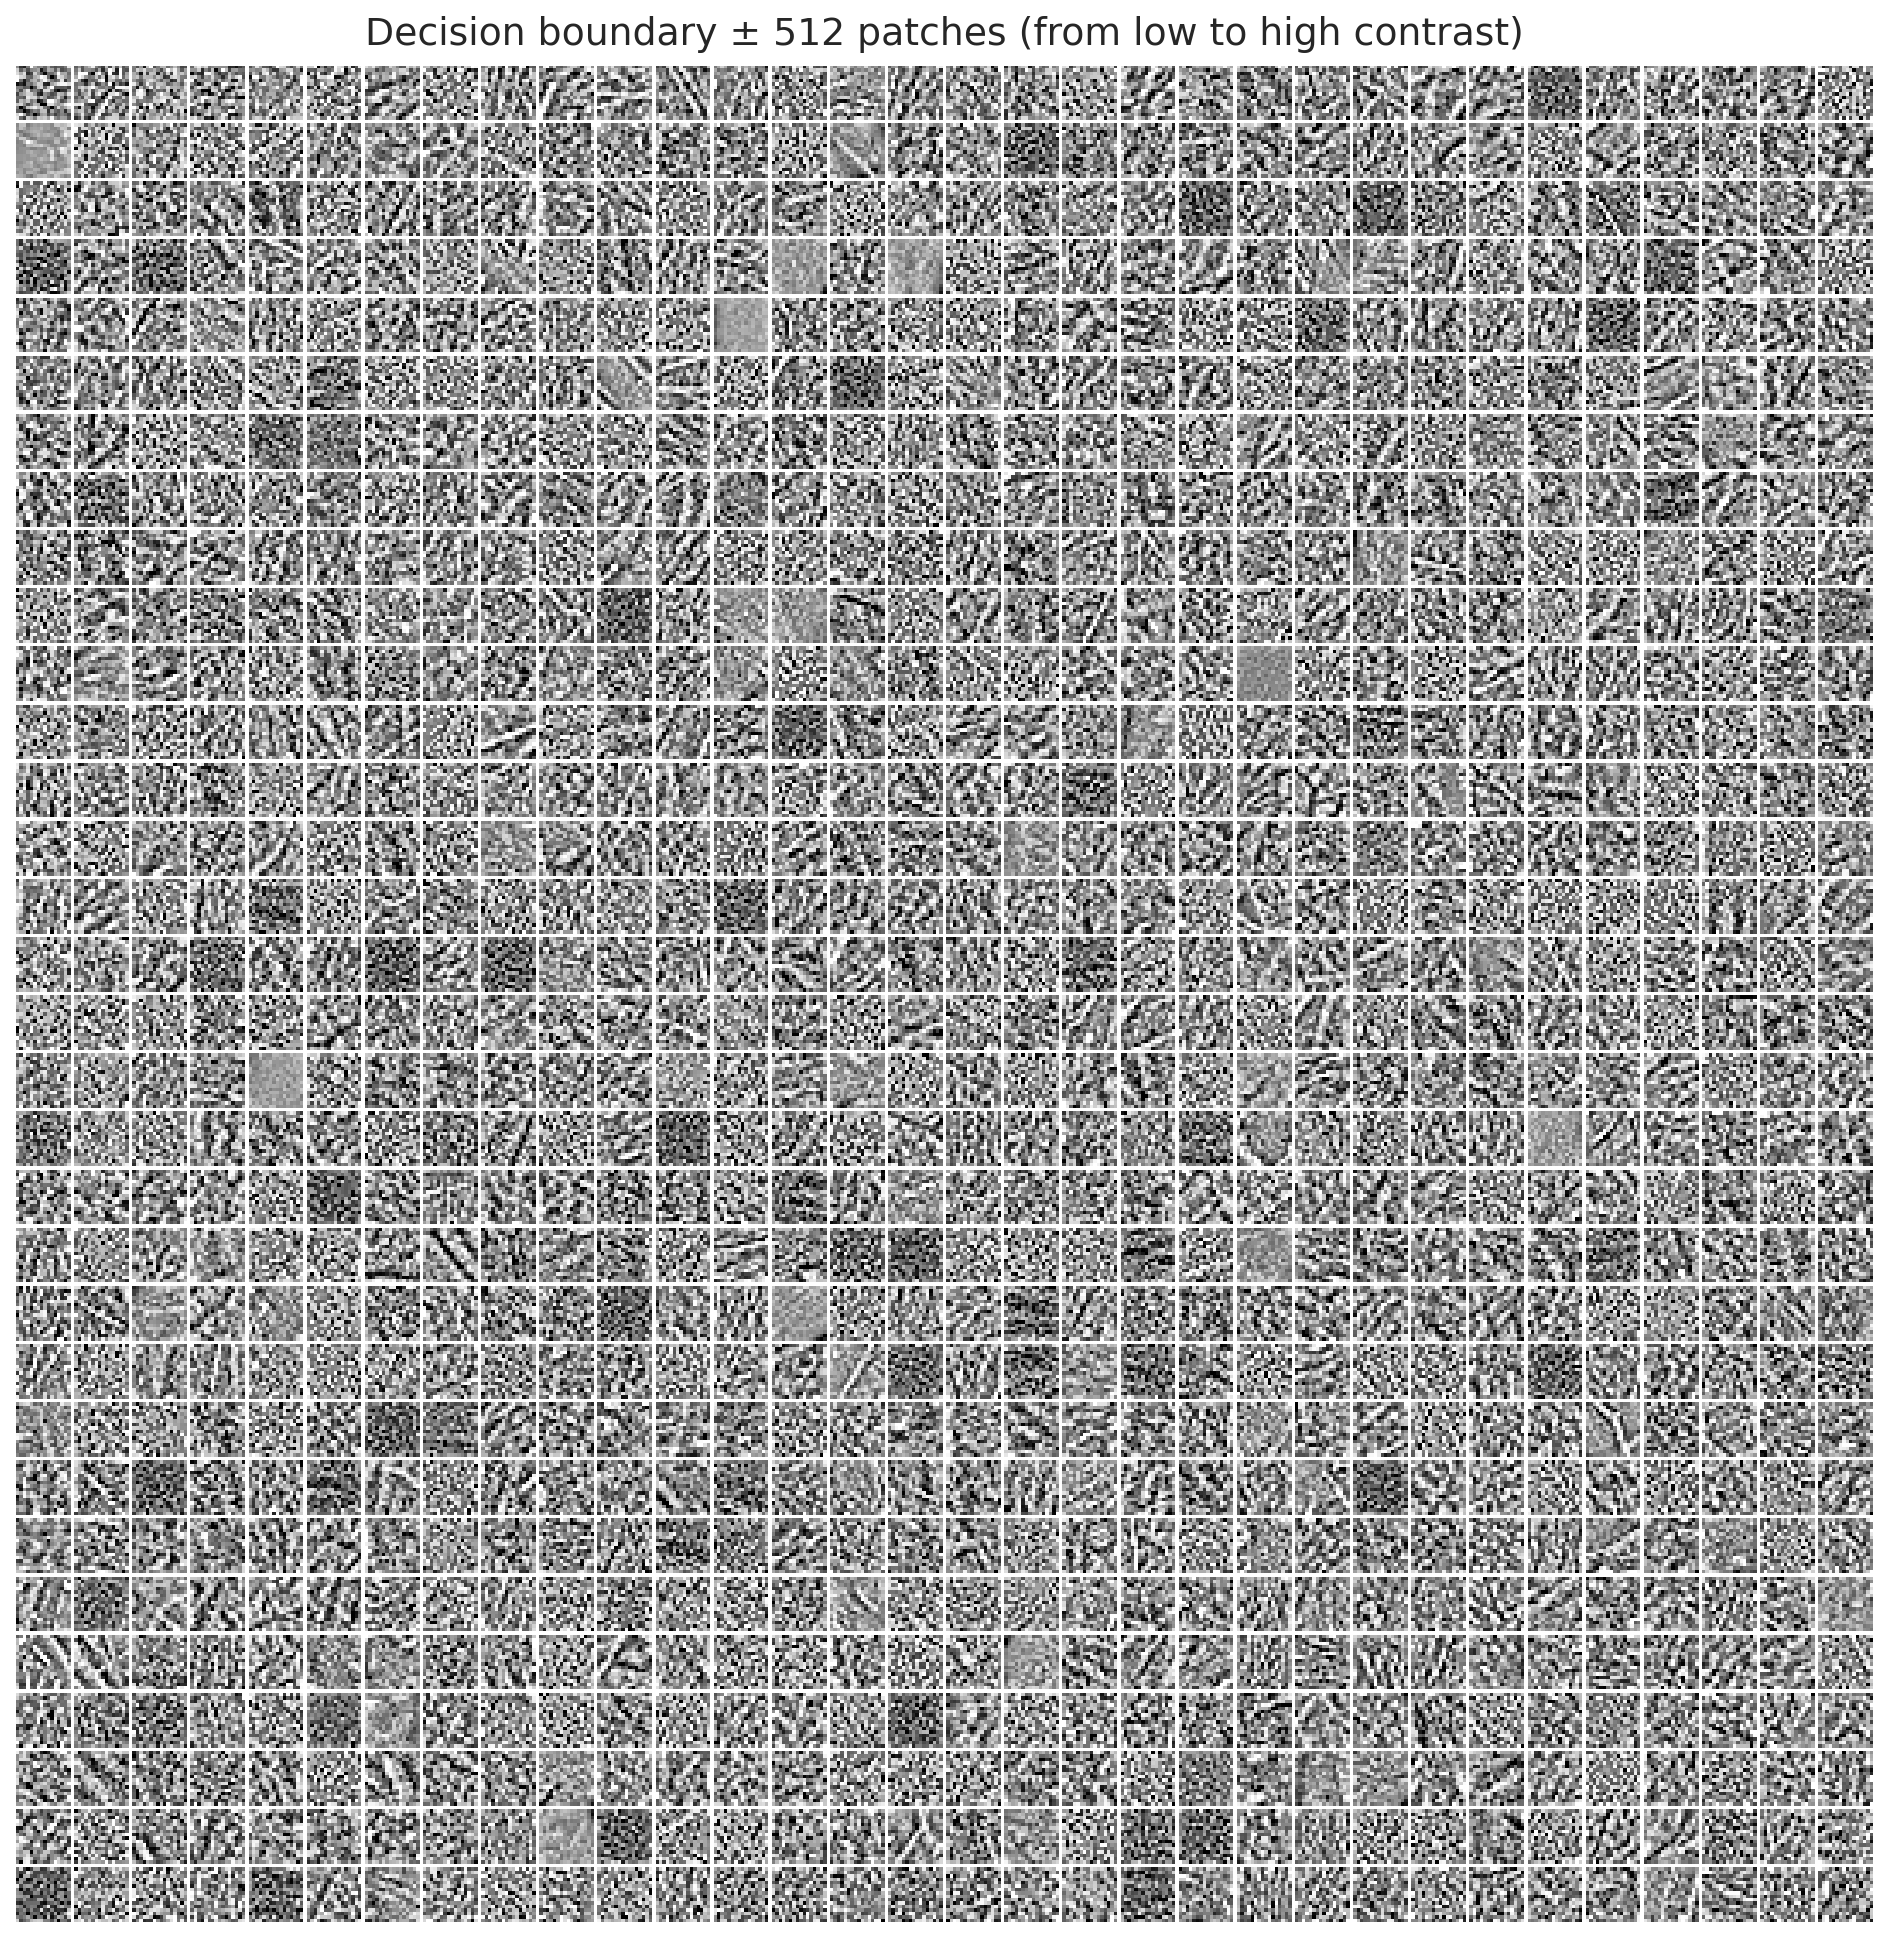

In [9]:
x2p = processed_sorted[boundary_i - 512: boundary_i +  512]
vmin, vmax = np.quantile(x2p, 0.03), np.quantile(x2p, 0.97)
fig, ax = plot_weights(x2p, method='none', vmin=vmin, vmax=vmax, display=False, nrows=32, figsize=(12, 12))
fig.suptitle('Decision boundary ± 512 patches (from low to high contrast)', fontsize=17)
display(fig)
plt.show()

## Plot bottom/top 512 (patches)

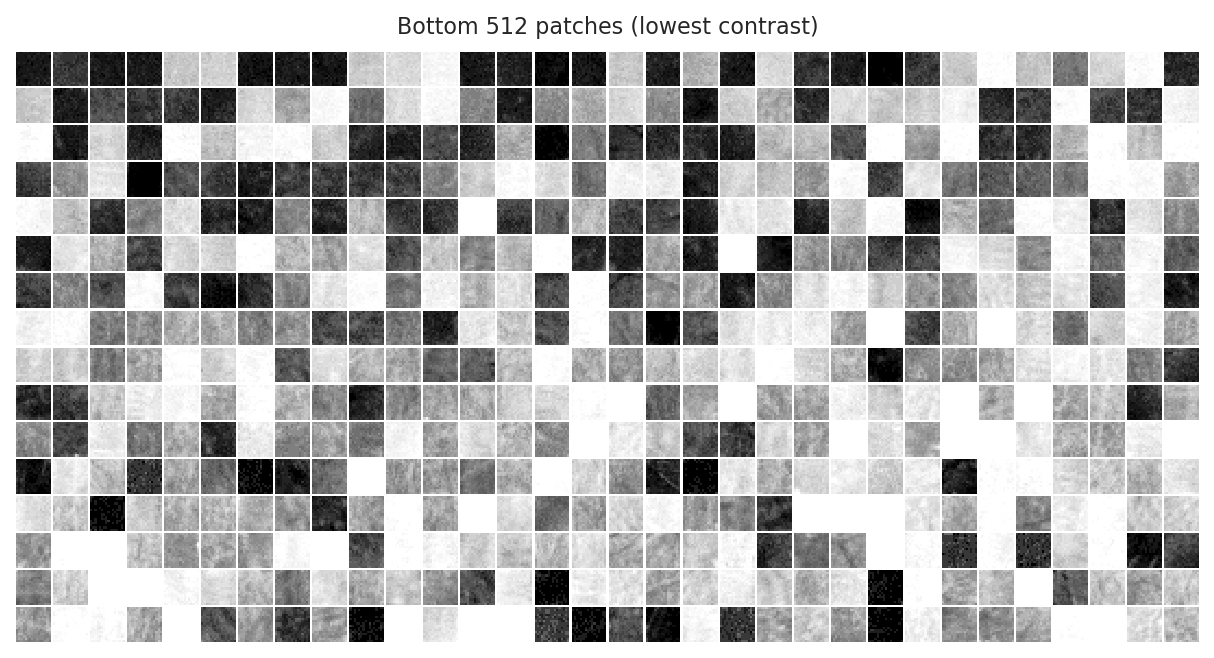

In [10]:
x2p = patches_sorted[:512]
fig, ax = plot_weights(x2p, method='none', vmin=np.quantile(x2p, 0.01), vmax=np.quantile(x2p, 0.90), display=False)
fig.suptitle('Bottom 512 patches (lowest contrast)', fontsize=10)
display(fig)
plt.show()

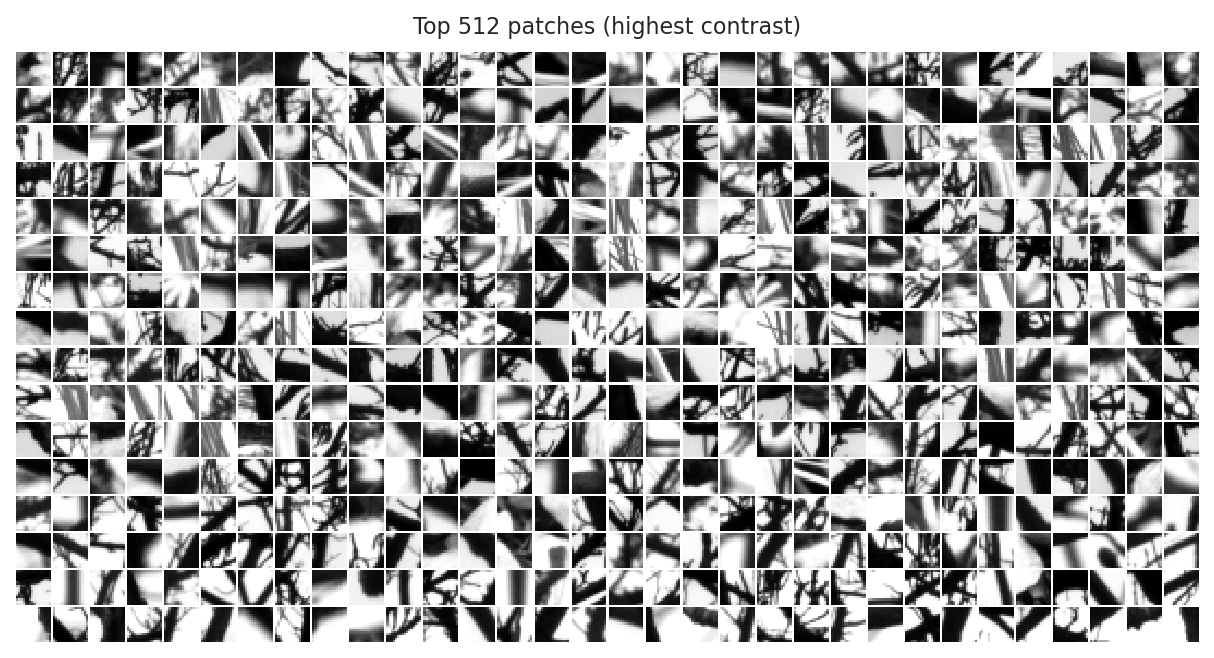

In [11]:
x2p = patches_sorted[-512:]
fig, ax = plot_weights(x2p, method='none', vmin=np.quantile(x2p, 0.01), vmax=np.quantile(x2p, 0.90), display=False)
fig.suptitle('Top 512 patches (highest contrast)', fontsize=10)
display(fig)
plt.show()

### Plot bottom/top 512 (x_wt_cn_zs)

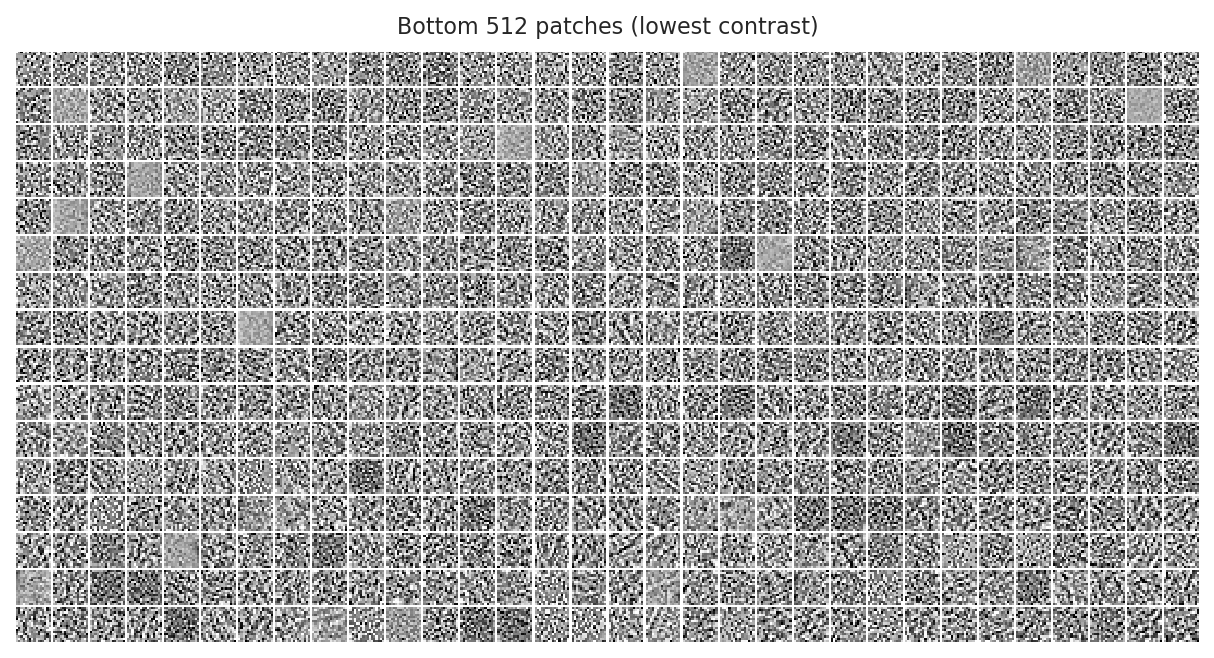

In [12]:
x2p = processed_sorted[:512]
vmin, vmax = np.quantile(x2p, 0.03), np.quantile(x2p, 0.97)
fig, ax = plot_weights(x2p, method='none', vmin=vmin, vmax=vmax, display=False)
fig.suptitle('Bottom 512 patches (lowest contrast)', fontsize=10)
display(fig)
plt.show()

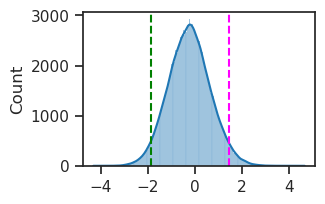

In [13]:
sns.histplot(x2p.ravel(), kde=True)
plt.axvline(vmin, color='g', ls='--')
plt.axvline(vmax, color='magenta', ls='--')
plt.show()

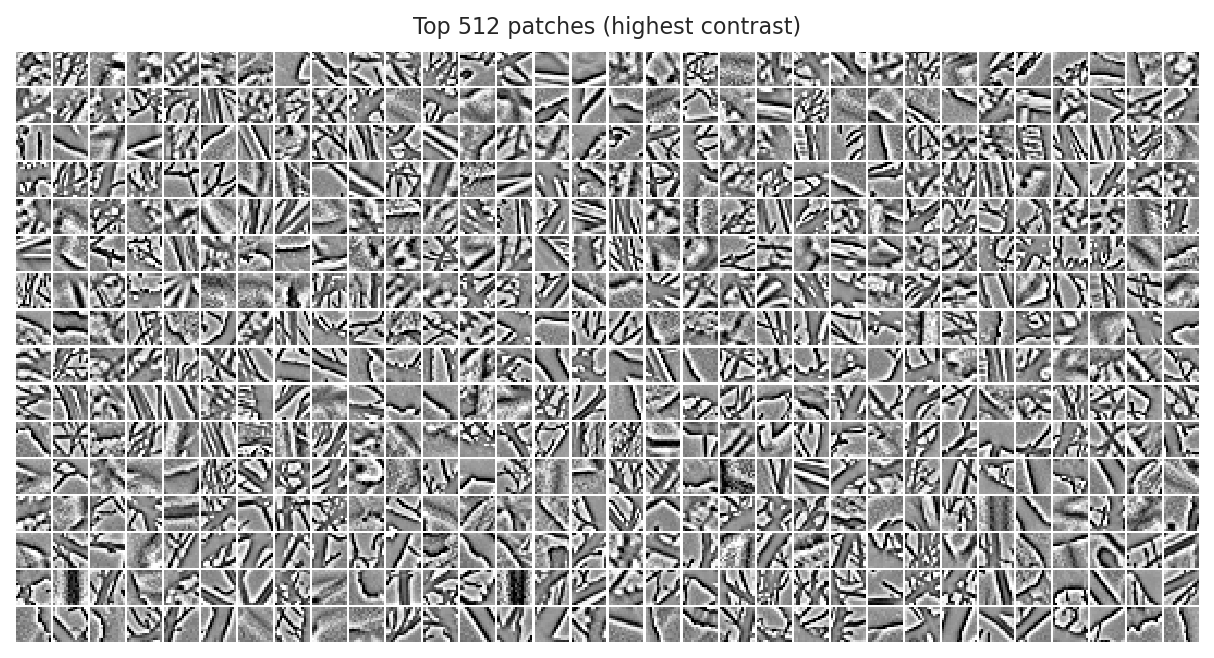

In [14]:
x2p = processed_sorted[-512:]
vmin, vmax = np.quantile(x2p, 0.03), np.quantile(x2p, 0.97)
fig, ax = plot_weights(x2p, method='none', vmin=vmin, vmax=vmax, display=False)
fig.suptitle('Top 512 patches (highest contrast)', fontsize=10)
display(fig)
plt.show()

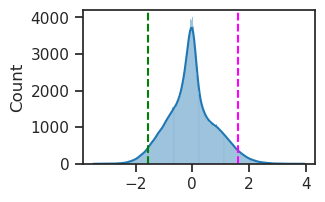

In [15]:
sns.histplot(x2p.ravel(), kde=True)
plt.axvline(vmin, color='g', ls='--')
plt.axvline(vmax, color='magenta', ls='--')
plt.show()

In [16]:
boundary_i = np.where(np.diff(accept_sorted.astype(int)) == 1)[0].item()

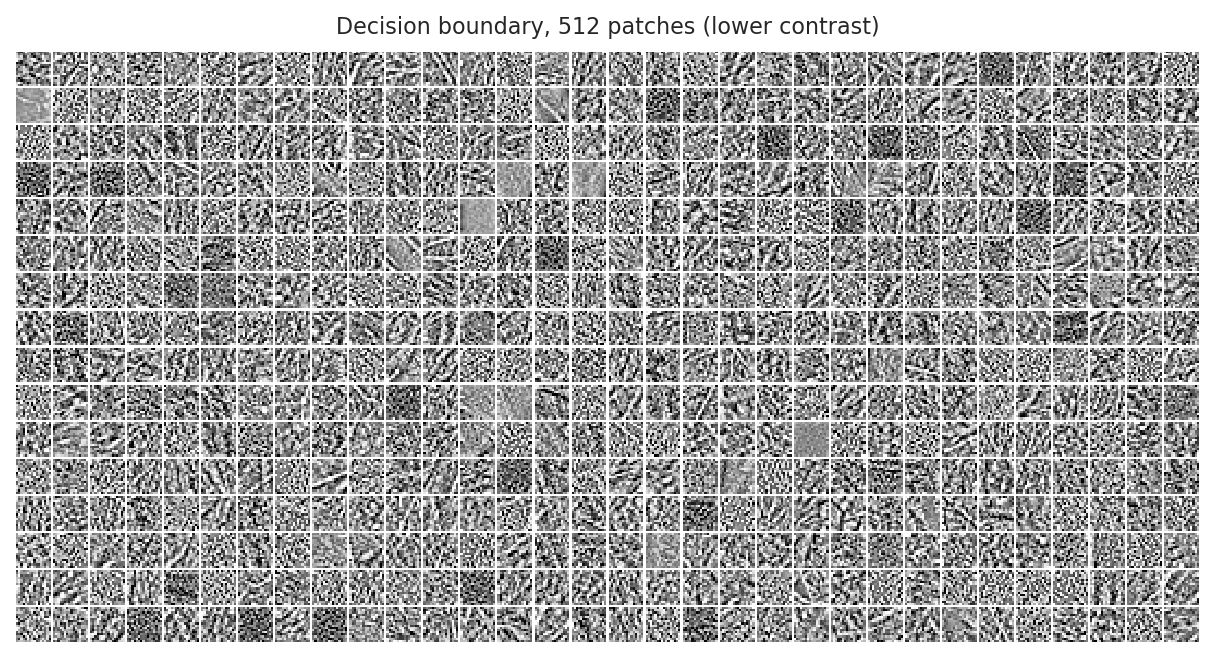

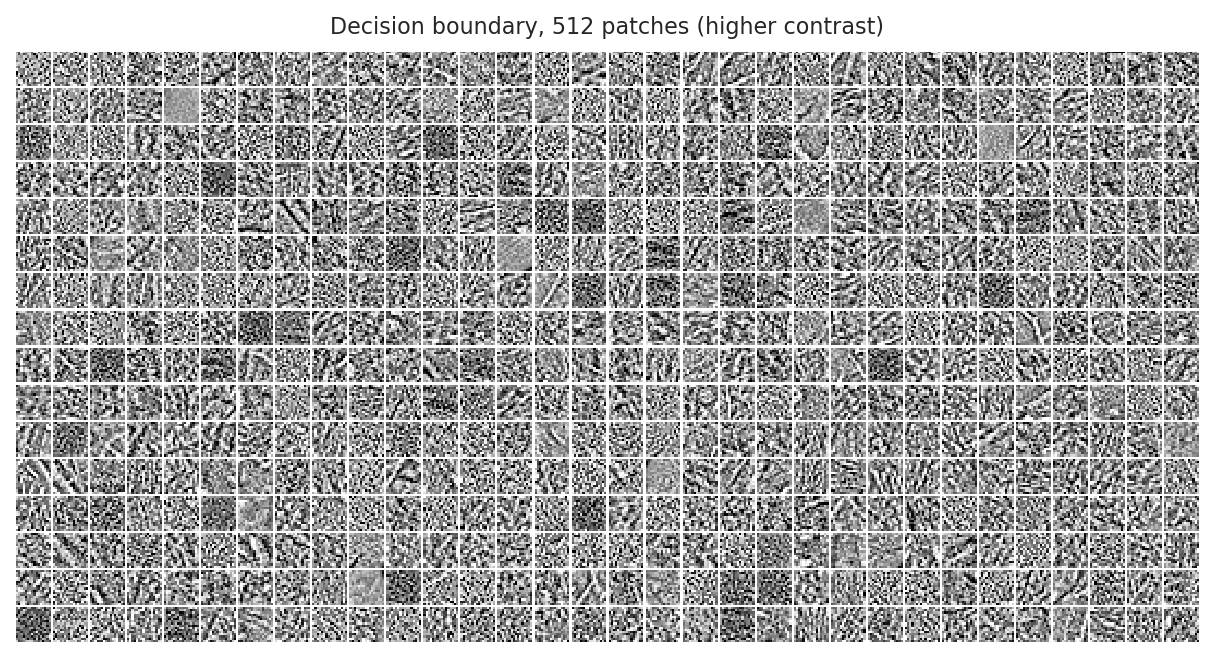

In [17]:
x2p = processed_sorted[boundary_i - 512:boundary_i]
vmin, vmax = np.quantile(x2p, 0.03), np.quantile(x2p, 0.97)
fig, ax = plot_weights(x2p, method='none', vmin=vmin, vmax=vmax, display=False)
fig.suptitle('Decision boundary, 512 patches (lower contrast)', fontsize=10)
display(fig)
plt.show()


x2p = processed_sorted[boundary_i: boundary_i +  512]
vmin, vmax = np.quantile(x2p, 0.03), np.quantile(x2p, 0.97)
fig, ax = plot_weights(x2p, method='none', vmin=vmin, vmax=vmax, display=False)
fig.suptitle('Decision boundary, 512 patches (higher contrast)', fontsize=10)
display(fig)
plt.show()